In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

import warnings
def ignore(*args, **kwargs):
    pass
warnings.warn = ignore

In [2]:
#load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("train shape :{} \ntest shape : {}".format(train.shape, test.shape))

train shape :(891, 12) 
test shape : (418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.groupby("Pclass")["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [5]:
train.groupby("Survived")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


<BarContainer object of 65 artists>

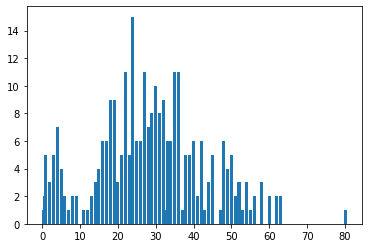

In [6]:
Age = train[train["Survived"] == 1]["Age"].value_counts().index
freq = train[train["Survived"] == 1]["Age"].value_counts().values
plt.bar(Age, freq)

<BarContainer object of 77 artists>

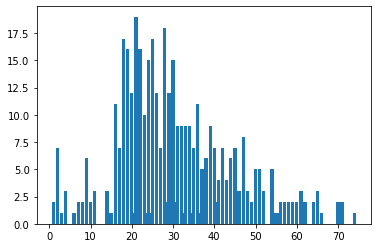

In [7]:
Age = train[train["Survived"] == 0]["Age"].value_counts().index
freq = train[train["Survived"] == 0]["Age"].value_counts().values
plt.bar(Age, freq)

## Cleaning Data

In [8]:
train = train.drop(["PassengerId", "Ticket"], axis = 1)

In [9]:
sub = test["PassengerId"]

In [10]:
test = test.drop(["PassengerId", "Ticket"], axis = 1)

In [11]:
y_train = train["Survived"]

In [12]:
train["Cabin"].fillna("U",inplace = True)
test["Cabin"].fillna("U", inplace = True)
train["Cabin"] = train["Cabin"].apply(lambda x:x[0])
test["Cabin"] = test["Cabin"].apply(lambda x:x[0])

In [13]:
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

In [14]:
train["Age"] = (train.groupby(["Sex","Pclass","Survived"])["Age"]
                .transform(lambda x:x.fillna(np.random.randint(x.median()-3,x.median()+3))))

In [15]:
test["Age"] = (test.groupby(["Sex","Pclass"])["Age"]
              .transform(lambda x:x.fillna(np.random.randint(x.median()-3,x.median()+3))))

In [16]:
test["Fare"] = (test.groupby(["Pclass","Sex", "Embarked"])["Fare"]
                .transform(lambda x: x.fillna(x.mean())))

In [17]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [18]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

##  Feature Engineering

In [19]:
corrmat = train.corr()["Survived"]
corrmat

Survived    1.000000
Pclass     -0.338481
Age        -0.065824
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [20]:
num_feat = train.dtypes[train.dtypes != "object"].index
cat_feat = train.dtypes[train.dtypes == "object"].index

In [21]:
train["Family"] = train["Parch"] + train["SibSp"] + 1
test["Family"] = test["Parch"] + test["SibSp"] + 1

In [22]:
def review(var):
    return train.groupby([var])["Survived"].mean()

In [23]:
train["FareSq"] = (train["Fare"]) ** .3333
test["FareSq"] = test["Fare"] ** .3333

In [24]:
index = review(train.columns[4]).sort_values().index
value = np.round(review(train.columns[4]).sort_values().values * 100)
repl2 = dict(zip(index,value))

In [25]:
train["SibSp"].replace(repl2, inplace=True)

In [26]:
test["SibSp"].replace(repl2,inplace = True)

In [27]:
#Pclass
index = review("Pclass").sort_values().index
value = np.round(review("Pclass").sort_values().values * 100)
pclass = dict(zip(index,value))

In [28]:
train["Pclass"].replace(pclass,inplace = True)
test["Pclass"].replace(pclass, inplace = True)

In [29]:
#Parch
index = review("Parch").sort_values().index
value = np.round(review("Parch").sort_values().values * 100)
parch = dict(zip(index,value))

In [30]:
train["Parch"].replace(parch,inplace = True)
test["Parch"].replace(parch, inplace = True)

In [31]:
#Family
index = review("Family").sort_values().index
value = np.round(review("Family").sort_values().values * 100)
family = dict(zip(index,value))

In [32]:
train["arranged_Family"] = train["Family"].replace(family)
test["arranged_Family"] = test["Family"].replace(family)

In [33]:
train["AgeGroup"] = train["Age"]//15
test["AgeGroup"] = test["Age"]//15

In [34]:
index = review("AgeGroup").sort_values().index
value = np.round(review("AgeGroup").sort_values().values * 100)
agegrp = dict(zip(index,value))

In [35]:
train["AgeGroup"].replace(agegrp, inplace = True)
test["AgeGroup"].replace(agegrp, inplace = True)

In [36]:
train["AgeSq"] = (train["AgeGroup"]) **.5
train["Fam"] = train["arranged_Family"] ** 2
test["AgeSq"] = test["AgeGroup"] ** .5
test["Fam"] = test["arranged_Family"] ** 2

In [37]:
#Scaling skewed data
#only fare has high skew
lam = 0.1
from scipy.special import boxcox1p
train["Fare"] = boxcox1p(train["Fare"], lam)
test["Fare"] = boxcox1p(test["Fare"], lam)

In [38]:
var = "AgeGroup"
train[var] = boxcox1p(train[var], lam)
test[var] = boxcox1p(test[var], lam)

In [39]:
train.skew()

Survived           0.478523
Pclass             0.492506
Age                0.562258
SibSp              0.920220
Parch              0.687367
Fare               0.776525
Family             2.727441
FareSq             1.230165
arranged_Family    0.459558
AgeGroup           0.817683
AgeSq              1.098355
Fam                1.023459
dtype: float64

In [40]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [41]:
title = train["Title"].value_counts()
other = title[title<10].index
replace = dict(zip(other,["other"]*len(other)))

In [42]:
test["Title"] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [43]:
train["Title"].replace(replace, inplace = True)
test["Title"].replace(replace, inplace = True)

In [44]:
test["Title"].replace({"Dona": "other"}, inplace = True)

In [45]:
#live = train[train["Survived"] == 1]
ordinal = train.groupby("Title")["Survived"].mean().sort_values()
ordinal = dict(zip(ordinal.index, np.arange(1,len(ordinal)+1)))

In [46]:
train.groupby("Title")["Survived"].mean()

Title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
other     0.444444
Name: Survived, dtype: float64

In [47]:
train["Title"].replace(ordinal, inplace = True)
test["Title"].replace(ordinal, inplace = True)

In [48]:
all_data = pd.concat((train.drop("Survived", axis = 1),test)).reset_index(drop = True)

In [49]:
all_data["FamilyName"] = all_data["Name"].apply(lambda x:x[:x.find(",")])

In [50]:
all_data.drop("Name", axis = 1, inplace = True)

In [51]:
pd.set_option("display.max_columns", 26)
all_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,FareSq,arranged_Family,AgeGroup,AgeSq,Fam,Title,FamilyName
0,24.0,male,22.0,71.0,34.0,2.349387,U,S,2,1.935311,55.0,4.228132,5.744563,3025.0,1,Braund
1,63.0,female,38.0,71.0,34.0,5.342771,C,C,2,4.145728,55.0,4.599745,6.557439,3025.0,5,Cumings
2,24.0,female,26.0,0.0,34.0,2.446889,U,S,1,1.993593,30.0,4.228132,5.744563,900.0,4,Heikkinen
3,63.0,female,35.0,71.0,34.0,4.904579,C,S,2,3.758149,55.0,4.599745,6.557439,3025.0,5,Futrelle
4,24.0,male,35.0,0.0,34.0,2.464213,U,S,1,2.004019,30.0,4.599745,6.557439,900.0,1,Allen


In [52]:
all_data = pd.get_dummies(all_data.drop(["Embarked"], axis = 1))
X = all_data[:891]
X_test = all_data[891:]

In [53]:
X.shape

(891, 898)

In [54]:
X_test.shape

(418, 898)

## Modeling with Python Library

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.neighbors import KNeighborsClassifier

In [56]:
KNN = make_pipeline(RobustScaler(), KNeighborsClassifier(algorithm="brute"))

In [57]:
lgr = make_pipeline(RobustScaler(), LogisticRegression(solver="lbfgs", random_state = 1))

In [58]:
dtree = make_pipeline(RobustScaler(), DecisionTreeClassifier(random_state=2))

In [59]:
rforest = make_pipeline(RobustScaler(),RandomForestClassifier(n_estimators=100, random_state=3))

In [60]:
svc = make_pipeline(RobustScaler(), SVC(gamma=.04))

In [61]:
linsvc = make_pipeline(RobustScaler(), LinearSVC(random_state=4))

In [62]:
n_fold = 5
def model_perf(model):
    kfold = KFold(n_fold, shuffle= True, random_state= 42).get_n_splits(X)
    rmse = (cross_val_score(model, X, y_train, scoring = "accuracy", cv= kfold))
    return rmse

In [63]:
class AverageModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.models]
        for models in self.models_:
            models.fit(X,y)
        return self
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.round(np.mean(predictions, axis=1))

In [64]:
average = AverageModel(models=[dtree, rforest, svc, KNN, linsvc, lgr])

In [65]:
model_perf(average).mean()

0.8327788588286988

In [78]:
model_perf(dtree).mean()

0.8429082764052745

In [67]:
model_perf(average).std()

0.030812786278639374

In [68]:
average.fit(X,y_train)
pred = average.predict(X_test)

In [69]:
submission = pd.DataFrame()
submission["PassengerId"] = sub
submission["Survived"] = pred.astype(int)

In [70]:
submission.dtypes

PassengerId    int64
Survived       int32
dtype: object

In [71]:
submission["Survived"].mean()

0.3229665071770335

In [72]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [73]:
submission.to_csv("Submission.csv", index = None)